**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage", 
    "fcc_astarr_macs_input_overlap",
    "fcc_starrmpracrispri_vote2",
    "run_umap"
)
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv 


In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage", 
    "fcc_astarr_macs_input_overlap",
    "fcc_starrmpracrispri_vote2",
    "run_umap"
)
txt_fname = "umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
#dat = dat %>% dplyr::left_join(mat_region_annot_merge, by = "Region")

dat_region_umap = dat
print(dim(dat))
head(dat)

[1] 33953     3


UMAP1,UMAP2,Region
<dbl>,<dbl>,<chr>
-1.680812,5.204691,chr1:605104-605675
8.620607,5.645398,chr1:778233-779389
-1.475871,3.743281,chr1:818708-819335
6.664661,4.790435,chr1:826796-828040
2.103905,6.490981,chr1:842516-843431
6.647105,4.062519,chr1:903783-905204


In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

copy.matrix.annotation.fcc_peak_call.tsv 
matrix.annotation.fcc_starrmpra_junke.merge_direction.tsv 
matrix.annotation.fcc_starrmpra_junke.tsv 
matrix.annotation.genome_tss.tsv 
region.annotation.encode_e2g_benchmark.tsv 
region.annotation.fcc_starrmpra_junke.assayvote.rmAR.tsv 
region.annotation.fcc_starrmpra_junke.assayvote.tsv 
region.annotation.fcc_starrmpra_junke.group.tsv 
region.annotation.fcc_starrmpra_junke.merge_direction.tsv 
region.annotation.fcc_starrmpra_junke.tsv 
region.annotation.fcc_starrmpracrispr.assayvote.tsv 
region.annotation.fcc_starrmpracrispr.concat.tsv 
region.intersect.pair.encode_chromatin_states.tsv 
region.intersect.pair.encode_e2g_benchmark.tsv 
region.intersect.pair.fcc_astarr_csaw.tsv 
region.intersect.pair.fcc_astarr_macs_narrowpeak.tsv 
region.intersect.pair.fcc_crispri_growth.tsv 
region.intersect.pair.fcc_crispri_hcrff.tsv 
region.intersect.pair.fcc_starrmpra_junke.tsv 
region.intersect.pair.genome_tss.tsv 
region.intersect.pair.module_tf_shannon.t

In [5]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "region.annotation.fcc_starrmpra_junke.group.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot = dat
print(dim(dat))
head(dat)

[1] 109394     10


Chrom,ChromStart,ChromEnd,Region,Direction_Assay,Num_Assay,TSS,Distance2TSS,TSS_Proximity,Group
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr1,115429,115969,chr1:115429-115969,Active,1,0,86059,Distal,Distal:Active
chr1,184091,184563,chr1:184091-184563,Active,1,0,154721,Distal,Distal:Active
chr1,605104,605675,chr1:605104-605675,Active,1,0,221848,Distal,Distal:Active
chr1,778233,779389,chr1:778233-779389,Active,3,0,48134,Distal,Distal:Active
chr1,818708,819335,chr1:818708-819335,Active,1,0,8188,Distal,Distal:Active
chr1,826796,828040,chr1:826796-828040,Active,1,1,0,Proximal,Proximal:Active


In [10]:
dat = dat_region_annot
dat = dat %>% dplyr::filter(Num_Assay > 1)
lst = split(dat$Region, dat$Group)

lst_vec_txt_region_fcc = lst
names(lst)

[1] "Distal:Active"       "Distal:Repressive"   "Proximal:Active"    
[4] "Proximal:Repressive"

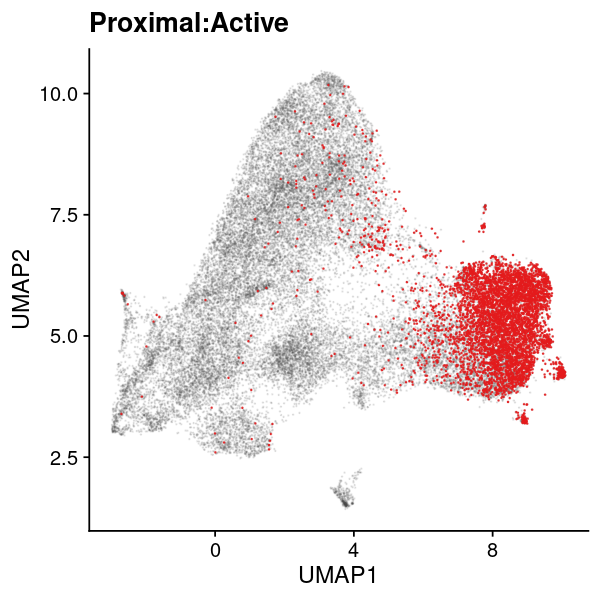

In [12]:
lst = lst_vec_txt_region_fcc
txt = "Proximal:Active"
vec = lst[[txt]]

dat = dat_region_umap
tmp = dat %>% dplyr::filter(Region %in% vec)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color="#e41a1c",size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = txt) 
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

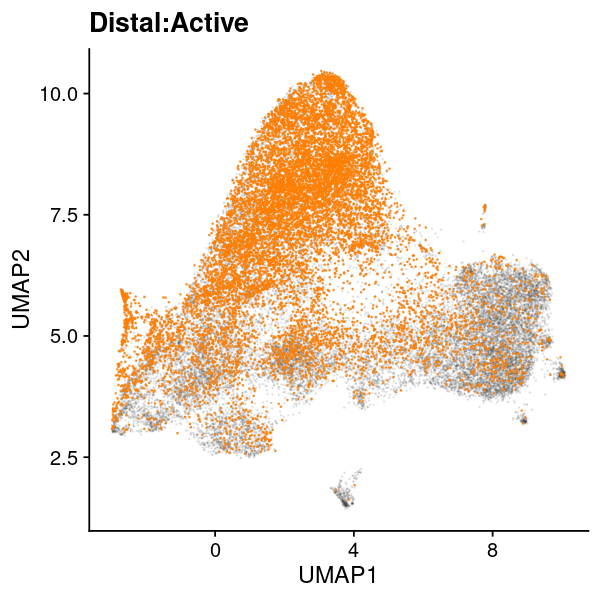

In [21]:
lst = lst_vec_txt_region_fcc
txt = "Distal:Active"
vec = lst[[txt]]

dat = dat_region_umap
tmp = dat %>% dplyr::filter(Region %in% vec)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color="#ff7f00",size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = txt) 
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

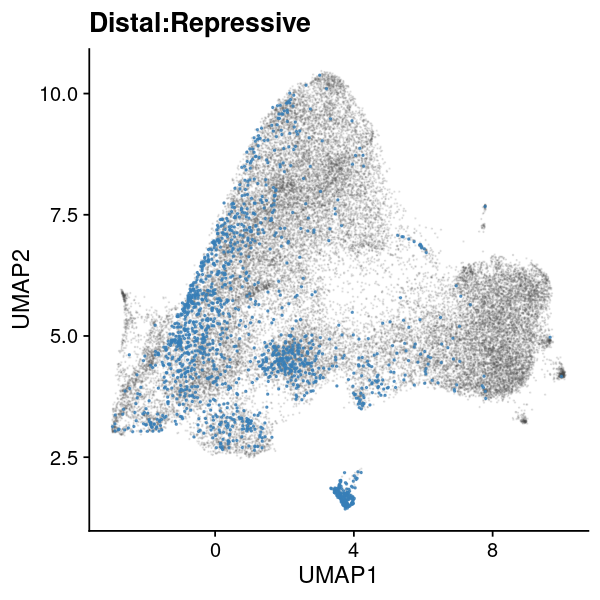

In [22]:
lst = lst_vec_txt_region_fcc
txt = "Distal:Repressive"
vec = lst[[txt]]

dat = dat_region_umap
tmp = dat %>% dplyr::filter(Region %in% vec)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color="#377eb8",size = 0.3, alpha = 0.7) +
    theme_cowplot() +
    labs(title = txt) 
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

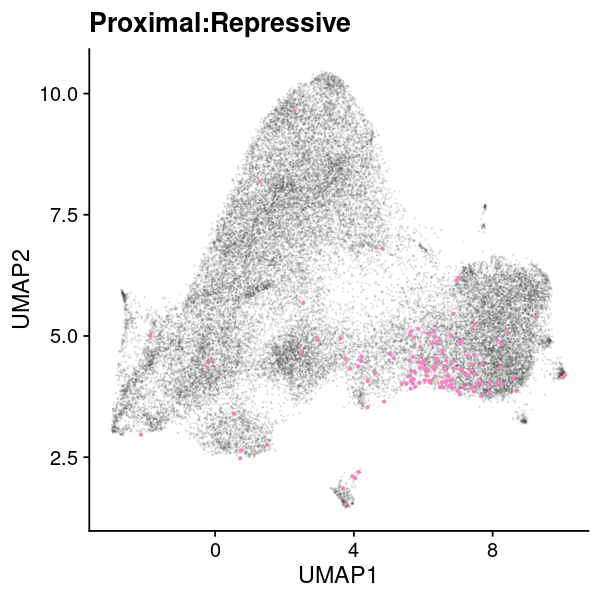

In [24]:
lst = lst_vec_txt_region_fcc
txt = "Proximal:Repressive"
vec = lst[[txt]]

dat = dat_region_umap
tmp = dat %>% dplyr::filter(Region %in% vec)

gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey30", size = 0.1, alpha = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color="#f781bf",size = 0.5) +
    theme_cowplot() +
    labs(title = txt) 
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)